In [15]:
from libsvm.python.svmutil import *
from libsvm.python.svm import *
from libsvm.python.commonutil import *

In [16]:
import numpy as np
from sklearn.datasets import dump_svmlight_file
import matplotlib.pyplot as plt

In [17]:
# "banknote authentication Data Set"
# Just load fisrt two feature since we need to visualize this
x = np.loadtxt("data_banknote_authentication.txt",dtype=np.float,delimiter=',')[:,0:2]
y = np.loadtxt("data_banknote_authentication.txt",dtype=np.float,delimiter=',')[:,-1].astype(int)

In [18]:
# pick 20% of data for test
msk = np.random.rand(len(x)) < 0.8

In [19]:
x_train = x[~msk]
y_train = y[~msk]

In [20]:
x_test = x[msk]
y_test = y[msk]

In [21]:
model = svm_train(y_train,x_train, '-c 2048')

In [22]:
p_label, p_acc, p_val = svm_predict(y_train, x_train, model)

Accuracy = 98.5965% (281/285) (classification)


In [23]:
p_label, p_acc, p_val = svm_predict(y_test, x_test, model)

Accuracy = 90.4324% (983/1087) (classification)


In [24]:
X0 = x_train[:,0]
X1 = x_train[:,1]

In [28]:
def plot_contours(xx, yy, **params):
    meshgrid = np.c_[xx.ravel(), yy.ravel()]
    p_label, p_acc, p_val  = svm_predict(np.zeros(len(meshgrid)),meshgrid, model,"-q")#just put a non-related y, so don't care the accuracy
    Z =  np.array(p_label).reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)    
    return out   

In [29]:
x_min = np.min(X0) - 1
x_max = np.max(X0) + 1
y_min = np.min(X1) - 1
y_max = np.max(X1) + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))


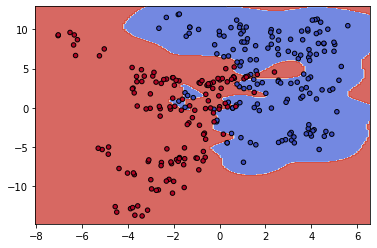

In [30]:
plot_contours(xx, yy,
                cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.show()